In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# **Glosary**

* ID: ID number of customers.
* Warehouse block: The company has a big warehouse that is divided into blocks (A-E).
* Mode of shipment: The company ships the products in multiple ways (Ship, Flight, and Road).
* Customer care calls: The number of calls made from inquiries for inquiries of the shipment.
* Customer rating: Rate from each customer. 1 is the lowest, and 5 is the highest.
* Cost of the product: Cost of the product in US Dollars.
* Prior purchases: The number of previous purchases.
* Product importance: The company has categorized the product in various parameters (low, medium, high).
* Gender: Male and female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: The weight in grams.
* Reached on time: 1 indicates that the product has not arrived on time, and 0 indicates the product has arrived on time.

# **Data Preprocessing**

## Importing the Data

In [2]:
df=pd.read_csv('Online Retail Shipping.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## Data Understanding

In [3]:
print(f'Number of rows and columns in the dataset {df.shape}')
df.info()

Number of rows and columns in the dataset (10999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [5]:
pd.set_option('display.max_colwidth', -1)
# unique data in each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,3,"[Flight, Ship, Road]"
3,Customer_care_calls,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,3,"[low, medium, high]"
8,Gender,2,"[F, M]"
9,Discount_offered,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


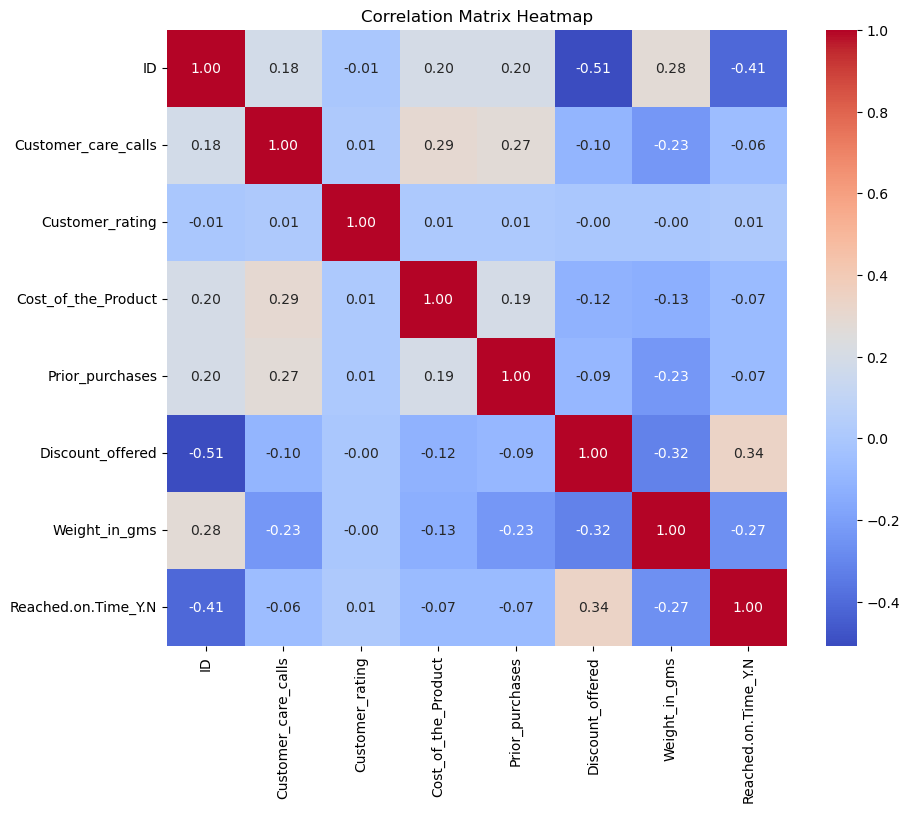

In [6]:
correlation_matrix = df.corr('spearman')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Data Cleaning

### MISSING VALUE

In [7]:
# persentage of missing value in each column
df.isna().sum()/df.shape[0]*100

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

In [8]:
df.isnull().sum()/df.shape[0]*100

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

### CHECK DUPLICATE

In [9]:
data_duplicate= df[df.duplicated(subset=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                                         'Prior_purchases','Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
                                         'Reached.on.Time_Y.N'])]
display(data_duplicate)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [10]:
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


### CHECK OUTLIERS

<Axes: xlabel='Weight_in_gms'>

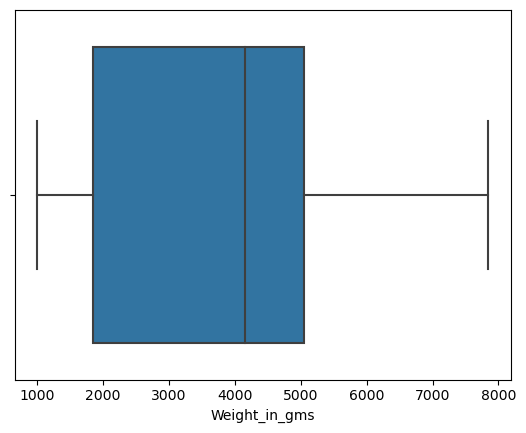

In [11]:
sns.boxplot(x=df['Weight_in_gms'])

In [12]:
Q1 = df['Weight_in_gms'].quantile(0.25)
Q3 = df['Weight_in_gms'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Weight_in_gms'] < (Q1 - 1.5 * IQR)) | (df['Weight_in_gms'] > (Q3 + 1.5 * IQR))]
print(f'The result of Q1 is: {Q1}')
print(f'The result of Q3 is: {Q3}')
display(outliers)

The result of Q1 is: 1839.5
The result of Q3 is: 5050.0


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


## **Problem To Solve**

### Reached on time

In [13]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

# Findings
* The Online Retail Shipping dataset contains 12 columns and 10,999 rows
* There are no columns that contain NaN values
* The ID column represents the customer identification number, which is an integer, and all of its values are unique, meaning there are no duplicate values
* Only the Warehouse_block, Mode_of_shipment, Product of importance, and Gender columns are object type columns
* Apart from the columns mentioned above, all other columns are integer type
* After checking using isna() and isnull(), there are no null or NaN values in the Online Retail Shipping data
* No duplicate data found after checking using .duplicated()
* No outliers were detected after checking using IQR
* Out of **10,999 orders**, **6,563** were marked as '1', meaning they weren't delivered on time. **That's more than half of all the orders.**

# **DATA ANALYSIS**

After we finished understanding and cleaning the data, we'll now look into **why more than half of the products aren't getting to their destinations on time.**

In shipping, knowing when a package should arrive is really important. Even being late by just one day can mess up a lot of things like making the product, selling it, and using it. So, being on time is a big deal in shipping.

Lots of things can affect shipping, like what happens in the warehouse. Things like sorting, picking, and loading can change when the product gets delivered. If these things are late, then sending out the product might be late too. So, the reason products aren't reaching on time isn't only because of shipping.

Our analysis will look at the 'Reached_on_Time' column compared with other things. We're focusing on this column because there are a lot of times when the product wasn't delivered on time. Now that our data is clean, we can start analyzing it. We're doing this analysis mainly for the stakeholder Transport Manager.

## Warehouse Block

Efficient loading and unloading can reduce delays at the warehouse and speed up turnaround times. Training staff and giving them the right tools can help a lot. Warehouses have many steps like sorting, picking, and loading that can slow down shipping. In this analysis, we will find the warehouse with the most "Not Reached On Time" deliveries.

In [14]:
df_ct1=pd.crosstab(df['Warehouse_block'],df['Reached.on.Time_Y.N'])
df_ct1['Total']=df_ct1.sum(axis=1)
df_ct1.sort_values(1,ascending=False)

Reached.on.Time_Y.N,0,1,Total
Warehouse_block,,,
F,1472,2194,3666
B,729,1104,1833
D,738,1096,1834
C,739,1094,1833
A,758,1075,1833


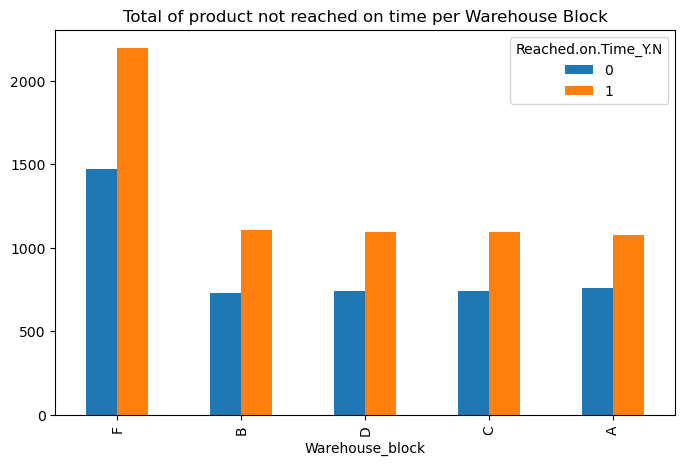

In [15]:
df_ct1.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total of product not reached on time per Warehouse Block')
plt.show()

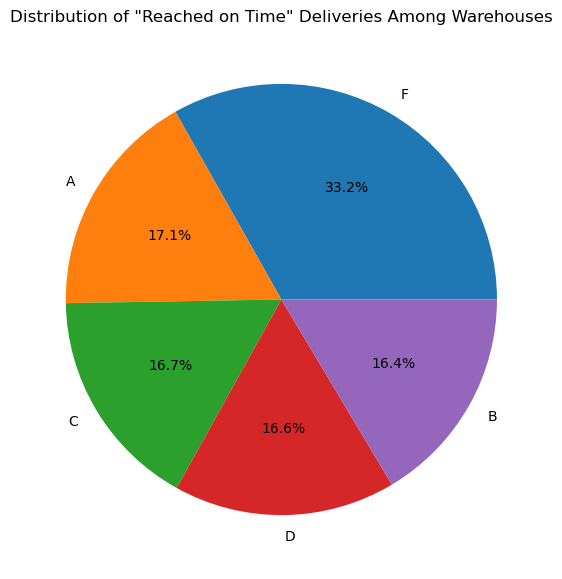

In [17]:
# Filter DataFrame for "Reached on Time" instances
df_not_on_time = df[df['Reached.on.Time_Y.N'] == 0]

# Get the counts for each warehouse
warehouse_counts = df_not_on_time['Warehouse_block'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,7))
plt.pie(warehouse_counts, labels=warehouse_counts.index, autopct='%1.1f%%')
plt.title('Distribution of "Reached on Time" Deliveries Among Warehouses')
plt.show()

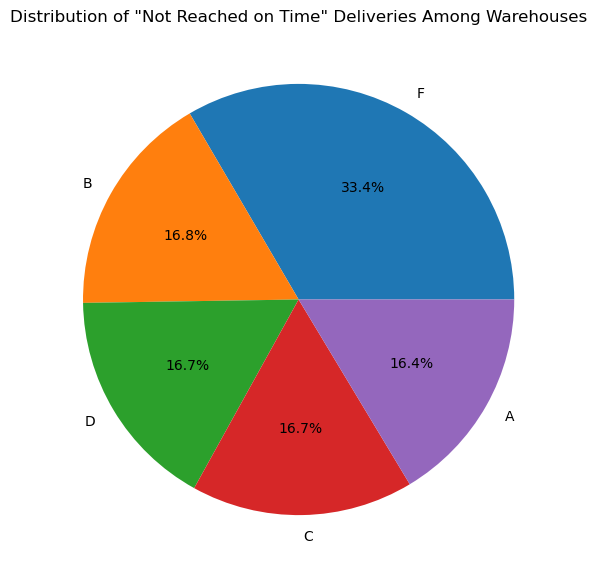

In [18]:
# Filter DataFrame for "Not Reached on Time" instances
df_not_on_time = df[df['Reached.on.Time_Y.N'] == 1]

# Get the counts for each warehouse
warehouse_counts = df_not_on_time['Warehouse_block'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,7))
plt.pie(warehouse_counts, labels=warehouse_counts.index, autopct='%1.1f%%')
plt.title('Distribution of "Not Reached on Time" Deliveries Among Warehouses')
plt.show()

The bar graph above shows that warehouse F has the most late deliveries. This might make it seem like warehouse F is the least efficient. However, a closer look shows that it's not the worst.

For example, warehouse B has only 16.4% of on-time deliveries but 16.8% of late deliveries. Only warehouse A has a "surplus," meaning it has a higher percentage of on-time deliveries (17.1%) compared to late deliveries (16.4%).

To improve efficiency in warehouses without an on-time delivery surplus, the transport manager could increase loading space to speed up loading. The warehouse location also affects delivery times. If a warehouse is in a hard-to-reach area, it can delay deliveries. Getting feedback from drivers about warehouse locations could help improve delivery efficiency.

## Mode of Shipment

The way products are shipped can affect if they arrive on time because different methods (air, ground, sea) take different amounts of time. Some methods, like road transport, can also handle changes more easily than ships or planes.

So, picking the right way to ship, based on the product and where it’s going, is important for making sure it gets there on time.

In [19]:
df_ct2=pd.crosstab(df['Mode_of_Shipment'],df['Reached.on.Time_Y.N'])
df_ct2['Total']=df_ct2.sum(axis=1)
df_ct2.sort_values('Total',ascending=False)

Reached.on.Time_Y.N,0,1,Total
Mode_of_Shipment,,,
Ship,3003,4459,7462
Flight,708,1069,1777
Road,725,1035,1760


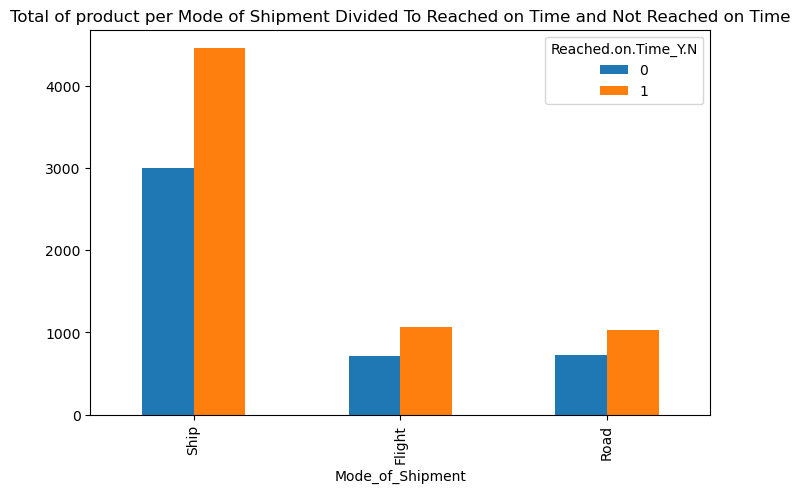

In [20]:
df_ct2.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total of product per Mode of Shipment Divided To Reached on Time and Not Reached on Time')
plt.show()

The most frequent mode of transport is Ship

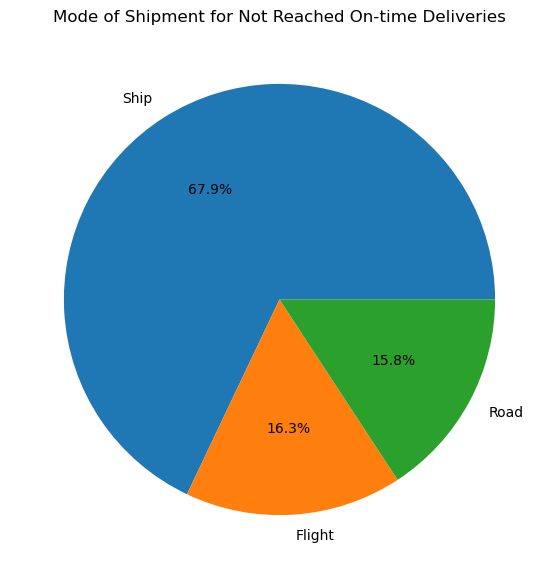

In [21]:
# Filter the DataFrame to only include rows where 'Reached.on.Time_Y.N' equals 1
df_filtered = df[df['Reached.on.Time_Y.N'] == 1]

# Now get the value counts of 'Mode_of_Shipment' in this filtered DataFrame
shipment_counts = df_filtered['Mode_of_Shipment'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,7))
plt.pie(df_filtered['Mode_of_Shipment'].value_counts(), labels=shipment_counts.index, autopct='%1.1f%%')
plt.title('Mode of Shipment for Not Reached On-time Deliveries')
plt.show()

The highest percentage for not reached on time for each mode of shipment is by Ship by 67.9%, Flight 16.3%, and Road 15.8%.

From the two graphs above, we can see that shipping is often late compared to other methods. Shipping is also the most commonly used method. To fix this, road transport could be a good option since it has the fewest late deliveries. But road transport can't be used if the shipment has to cross water.

Air transport is the next best option. It can be expensive, but it has fewer late deliveries than shipping. Shipping is cheaper and can cross seas, but it has more late deliveries.

To improve shipping, here are some suggestions:

* Add extra time to the Estimated Time of Arrival (ETA) to avoid late deliveries.
* Work with a Third Party Logistics (3PL) provider known for on-time deliveries.
* Use real-time tracking to monitor shipments and address delays quickly.
* Use advanced routing software to find the best routes, taking into account traffic, road conditions, and weather, to reduce transit times and increase the chances of on-time delivery.

## Customer Rating

When deliveries arrive on time, customers are usually happy with the service. If deliveries are late, customers often feel disappointed. So, we can assume there is a link between customer ratings and on-time delivery. This relationship will be examined in the analysis below.

In [22]:
df_ct3=pd.crosstab(df['Customer_rating'],df['Reached.on.Time_Y.N'])
df_ct3['Total']=df_ct3.sum(axis=1)
df_ct3.sort_values(0, ascending=False)

Reached.on.Time_Y.N,0,1,Total
Customer_rating,,,
1,922,1313,2235
2,892,1273,2165
4,886,1303,2189
3,882,1357,2239
5,854,1317,2171


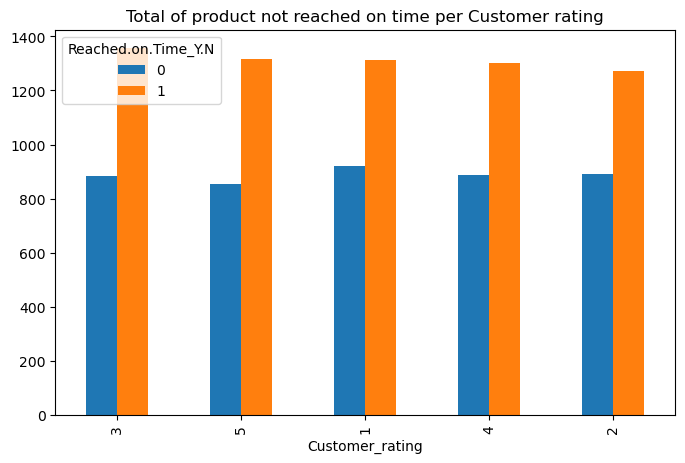

In [23]:
df_ct3.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total of product not reached on time per Customer rating')
plt.show()

Products with a customer rating of 1, which shows the lowest satisfaction, surprisingly have the most on-time deliveries (value of '0'). On the other hand, products with a rating of 5, the highest satisfaction, have the fewest on-time deliveries. This suggests that a high rating reflects overall customer satisfaction, not just timely delivery.

Several factors can affect customer ratings even if the delivery is on time, such as:

* The delivery was on time, but the quantity was incorrect.
* The product was damaged during delivery.
* The product was different from what the customer ordered.
* The product was not of the expected quality.
* There was a lack of proper updates or tracking information during shipping.

## Prior Purchases

When an order is placed many times, the driver gets to know the customer's location better. This can make deliveries faster and improve the "Reached on Time" rate. In this analysis, we will check if this idea is correct.

In [24]:
df_ct4=pd.crosstab(df['Prior_purchases'],df['Reached.on.Time_Y.N'])
df_ct4['Total']=df_ct4.sum(axis=1)
df_ct4.sort_values(1,ascending=False)

Reached.on.Time_Y.N,0,1,Total
Prior_purchases,,,
3,1421,2534,3955
2,974,1625,2599
4,984,1171,2155
5,645,642,1287
6,247,314,561
10,76,102,178
7,44,92,136
8,45,83,128


In [26]:
chi2, p, dof, expected = chi2_contingency(df_ct4)


if p <= 0.05:
    print("There is a significant relationship between Prior Purchases and Reached on Time.") # Ha
else:
    print("There is no significant relationship between Prior Purchases and Reached on Time.") # H0

print("Chi-square statistic:", chi2)
print("p-value:", p)

There is a significant relationship between Prior Purchases and Reached on Time.
Chi-square statistic: 125.92207081942591
p-value: 4.327024591861862e-20


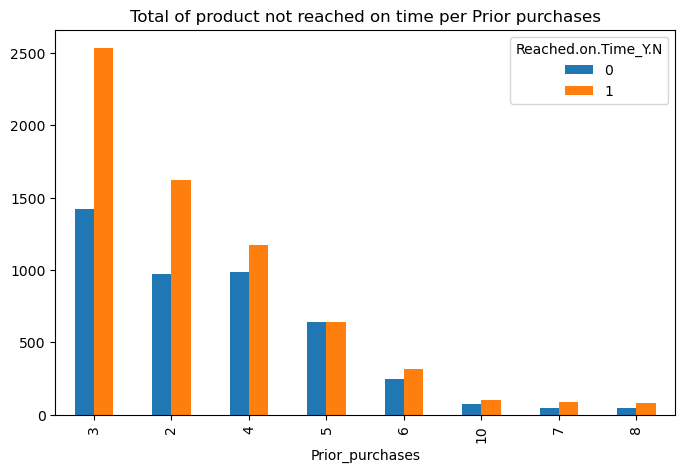

In [27]:
df_ct4.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total of product not reached on time per Prior purchases')
plt.show()

The graph and the chi-square test show that orders with three prior purchases are most often late. Also, the rate of late deliveries goes down as the number of prior purchases goes up. The chi-square test confirms that there's a significant link between the number of prior purchases and on-time delivery.

# Conclusions

* Each warehouse has its own issues, like Warehouse F handling a large volume of products. These issues can affect on-time deliveries, so improving warehouse processes is important.
* Every shipping method has its own challenges, so a good plan is crucial to meet the promised ETA.
* Customer ratings might not show the whole customer satisfactory process, but problems like mistakes during picking can lead to dissatisfaction and low ratings, even if the delivery was on time.
* Regular orders help drivers get familiar with the area, increasing the chances of on-time deliveries.

# Recommendations

* Keep a surplus percentage in each warehouse block to avoid shortfalls.
* Have Warehouse A share its loading methods and layout plans with other warehouses. Regular comparisons can lead to improvements across all warehouse locations.
* Add extra time to the Estimated Time of Arrival (ETA) to reduce the risk of late deliveries.
* Work with a Third Party Logistics (3PL) provider known for on-time deliveries.
* Use real-time tracking for the transport team to monitor shipments and quickly address any delays.
* Use advanced routing software to find the best routes, considering traffic, road conditions, and weather. This can help reduce transit times and increase on-time deliveries.
* Implement a tracking system for customers to monitor their deliveries. This transparency can improve customer satisfaction.
* When possible, use the same driver or 3PL for repeat customers. This helps the driver get familiar with the location and speeds up delivery.
